# Stopnja kriminala v Sloveniji po letih v korelaciji z ostalimi podatki

Podatkovno Rudarjenje, 2022/23

**Sašo Primožič, Ambrož Perovšek, Andraž Adamič, Matija Ječnik**

## Opis podatkov

[Vir podatkov](https://podatki.gov.si/dataset/mnzpkazniva-dejanja-od-leta-2009-dalje)

Podatki so podani v datotekah za vsako preteklo leto iz obdobja 2010-2019. V datoteki so zajeta vsa kazniva dejanja, za katera je policija vložila kazensko ovadbo ali poročilo. Združuje kazniva dejanja in osebe, udeležene v kaznivih dejanjih.

Struktura baze za kazniva dejanja (KD) je sledeča:
- številka za štetje in ločevanje posameznega kaznivega dejanja
- datum storitve kaznivega dejanja (MM.LLLL)
- ura storitve kaznivega dejanja (intervali v obliki HH:mm - HH:mm)
- dan v tednu (opisan z besedo)
- Policijska uprava storitve kaznivega dejanja
- atribut o tem, ali je osumljenec policiji znan ali ne (povratnik)
- klasifikacija kaznivega dejanja (zakon/člen/odstavek/točka/alinea - tekst člena)
- poglavje zakonika
- vrsta kriminalitete (splošna/gospodarska)
- vrsta kriminalitete (organizirana)
- vrsta kriminalitete (mladoletniška)
- dokončanost kaznivega dejanja - DA/NE
- kriminalistična označba 1
- kriminalistična označba 2
- kriminalistična označba 3
- uporabljeno sredstvo 1
- uporabljeno sredstvo 2
- uporabljeno sredstvo 3
- uporabljeno sredstvo 4
- upravna enota, kjer je bilo storjeno kaznivo dejanje
- podroben opis prizorišča kaznivega dejanja
- leto zaključnega dokumenta
- vrsta zaključnega dokumenta
- številka za štetje in ločevanje oseb, udeleženih v kaznivih dejanjih
- kot kaj nastopa oseba v kaznivem dejanju
- starostni razred, ki mu oseba pripada ob storitvi kaznivega dejanja
- spol
- državljanstvo osebe (le slovensko in tuje)
- poškodba osebe
- vpliv alkohola
- vpliv mamil
- pripadnost organizirani združbi
- materialna škoda v EUR

## Opis problema

Problem, ki ga želimo rešiti s to analizo podatkov, je razumevanje trendov in vzorcev v kriminaliteti v Sloveniji v obdobju od leta 2010 do 2019 oziroma kamor segajo najzgodnejši zapisi kaznivih dejanj. Pomembnejši cilji in vprašanja, na katera bomo skušali odgovoriti tekom analize podatkov, vključujejo naslednje:

- Trendi v kriminaliteti: Kako se je število kaznivih dejanj spreminjalo skozi leta? Ali so se določene vrste kaznivih dejanj povečevale ali zmanjševale v analiziranem obdobju?
- Geografska analiza: Kje se je največ kaznivih dejanj dogajalo v Sloveniji v različnih letih? Ali obstajajo določene policijske uprave ali regije, kjer je kriminalnost višja v primerjavi z drugimi?
- Vrste kaznivih dejanj: Katera kazniva dejanja so najpogostejša v Sloveniji? Ali so se vrste kaznivih dejanj spreminjale skozi leta?
- Osebe udeležene v kaznivih dejanjih: Kakšne so značilnosti oseb, udeleženih v kaznivih dejanjih, kot so starostni razred, spol, državljanstvo itd.?
- Vpliv alkohola in mamil: Kako pogosto so alkohol in mamila vpleteni v kazniva dejanja? Katera kazniva dejanja so najpogosteje povezana z alkoholom ali mamili?
- Dokončanost kaznivih dejanj: Kolikšen delež kaznivih dejanj je bil dokončan in koliko jih je ostalo poskusov?
- Organizirana kriminaliteta: Kako se je organizirana kriminaliteta pojavljala v Sloveniji v analiziranem obdobju? Katera vrsta kaznivih dejanj je najpogosteje povezana z organiziranimi združbami?
- Materialna škoda: Kolikšna je bila povprečna materialna škoda, povzročena s kaznivimi dejanji v analiziranem obdobju? Katera vrsta kaznivih dejanj je povzročila največjo materialno škodo?
- Čas kaznivega dejanja: Ob kateri uri je izvedenih največ kaznivih dejanj? Ali ura vpliva na količino izvedenih kaznivih dejanj v analiziranem obdobju?

Te cilje in vprašanja bomo poskušali doseči z uporabo statističnih analiz, grafičnih prikazov, primerjav med leti, geografskih analiz ter drugih metod analize podatkov, ki nam bodo omogočile boljše razumevanje kriminalitete v Sloveniji ter identifikacijo ključnih trendov in vzorcev.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [43]:
kd2010 = pd.read_csv("podatki/kd2010.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2011 = pd.read_csv("podatki/kd2011.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2012 = pd.read_csv("podatki/kd2012.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2013 = pd.read_csv("podatki/kd2013.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2014 = pd.read_csv("podatki/kd2014.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2015 = pd.read_csv("podatki/kd2015.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2016 = pd.read_csv("podatki/kd2016.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2017 = pd.read_csv("podatki/kd2017.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2018 = pd.read_csv("podatki/kd2018.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd2019 = pd.read_csv("podatki/kd2019.csv", delimiter=";", encoding="ANSI", dtype={'MesecStoritve': str})
kd = pd.concat([kd2010, kd2011, kd2012, kd2013, kd2014, kd2015, kd2016, kd2017, kd2018, kd2019], names=['letoVnosa'], keys=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',])
# kd = kd.drop("ZaporednaStevilkaKD", axis="columns")

In [44]:
kd['MesecStoritve'] = pd.to_datetime(kd['MesecStoritve'], format='%m.%Y', exact=True)
kd = kd.rename(columns={'MesecStoritve': 'datumStoritve'})
kd.sort_values(by=['datumStoritve', 'UraStoritve'], inplace=True)
# kd.reset_index(drop=True, inplace=True)

## Rezultati, analize in ugotovitve

### Osebe, udeležene v kaznivih dejanjih
- Graf storilcev kaznivih dejanj, ločen glede na dneve v tednu

<BarContainer object of 7 artists>

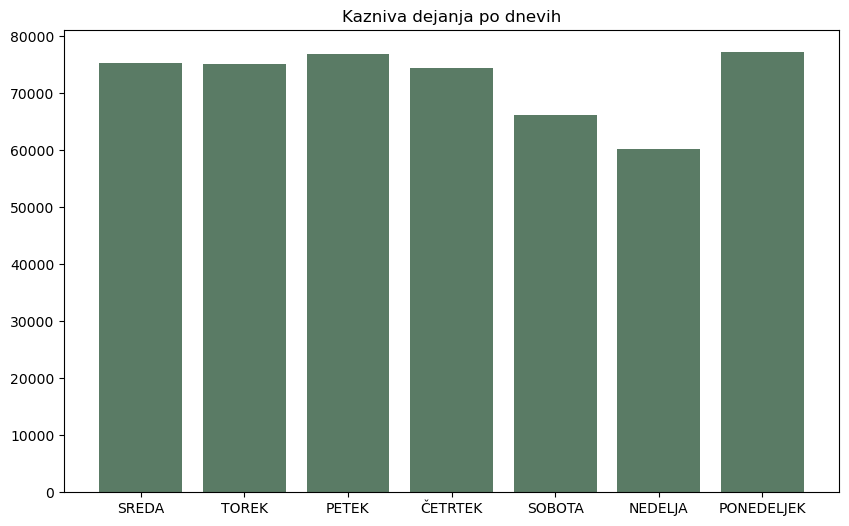

In [45]:
# print(kd[1:10])

dnevi = {}
for dan in kd['DanVTednu'].unique():
    dnevi[dan] = np.unique(np.asarray(kd.loc[kd['DanVTednu'] == dan, ['ZaporednaStevilkaKD']]))
# dnevi['SREDA'].size
plt.figure(figsize=(10,6))
plt.title('Kazniva dejanja po dnevih')
plt.bar(dnevi.keys(), [d.size for d in dnevi.values()], color='#5A7B65')

Ponedeljek in petek imata največje število kaznivih dejanj, tesno pa jim sledijo ostali dnevi v tednu. Izjema tu sta sobota in nedelja, kjer opazimo rahlo znižanje.

### Po letih v obdobju 2010 do 2019

<BarContainer object of 10 artists>

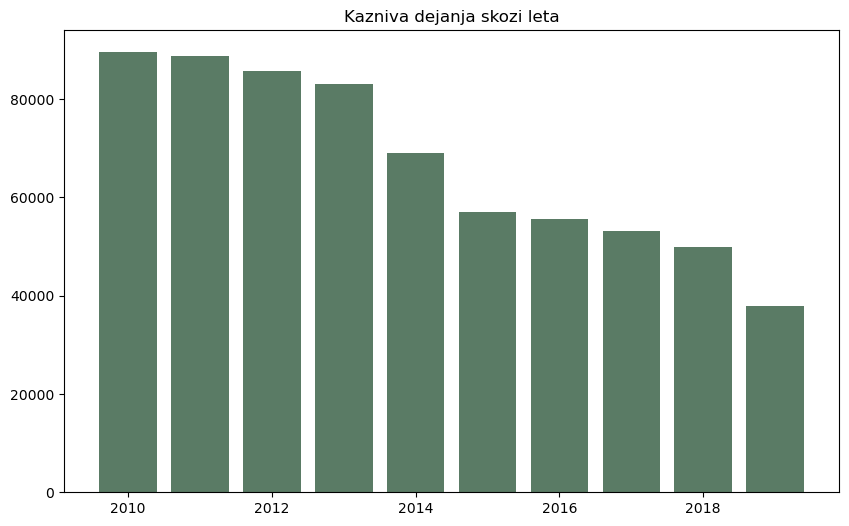

In [46]:
dan = []
for datum in range(2010, 2020):
    dan.append(np.unique(np.asarray(kd.loc[(kd['datumStoritve'] > str(datum) + '-01-01') & (kd['datumStoritve'] < str(datum + 1) + '-01-01'), ['ZaporednaStevilkaKD']])).size)

plt.figure(figsize=(10,6))
plt.title('Kazniva dejanja skozi leta')
plt.bar(range(2010, 2020), dan, color='#5A7B65')

Število kaznivih dejanj pada, ko se približujemo koncu obdobja, za kar pa obstajajo še neodgovorjena vprašanja.

### Graf storilcev kaznivih dejanj, ločen glede na spol osumljenca

<BarContainer object of 2 artists>

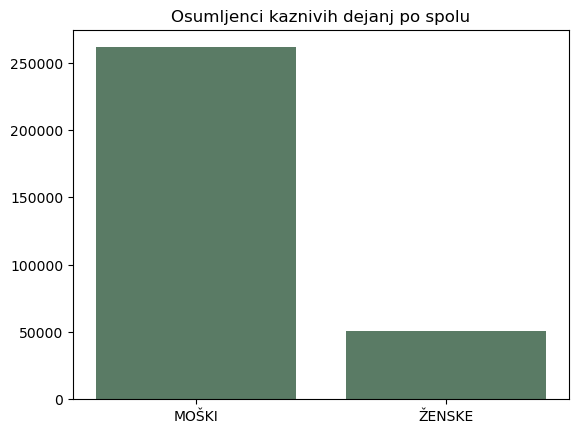

In [47]:
plt.title('Osumljenci kaznivih dejanj po spolu')
plt.bar(['MOŠKI', 'ŽENSKE'], [kd.query("Spol == 'MOŠKI' & (VrstaOsebe == 'NEOVADENI OSUMLJENEC (ARHIV)' | VrstaOsebe == 'OVADENI OSUMLJENEC')")['Spol'].size, kd.query("Spol == 'ŽENSKI' & (VrstaOsebe == 'NEOVADENI OSUMLJENEC (ARHIV)' | VrstaOsebe == 'OVADENI OSUMLJENEC')")['Spol'].size], color='#5A7B65')
# kd['VrstaOsebe'].unique()
# np.unique(np.asarray(kd.loc[(kd['Spol'] == 'MO\x8aKI'), ['ZaporednaStevilkaKD']])).size


Iz grafa lahko razberemo, da je število osumljencev moškega spola približno petkrat večje kot od nasprotnega spola.

### Podoben graf, vendar tokrat le z žrtvami kaznivih dejanj

<BarContainer object of 2 artists>

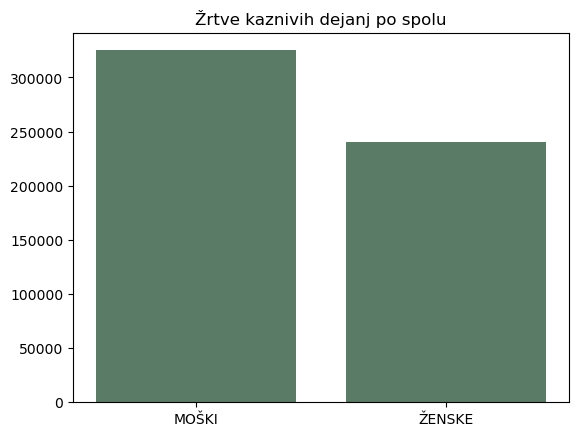

In [48]:
plt.title('Žrtve kaznivih dejanj po spolu')
plt.bar(['MOŠKI', 'ŽENSKE'], [kd.query("Spol == 'MOŠKI' & VrstaOsebe == 'ŽRTEV'")['Spol'].size, kd.query("Spol == 'ŽENSKI' & VrstaOsebe == 'ŽRTEV'")['Spol'].size], color='#5A7B65')

Tudi tu prevladujejo moški, vendar se število žensk prav tako poveča. Opazimo lahko tudi veliko povečanje števila žrtev v primerjavi s številom osumljencev.

### Graf kaznivih dejanj po urah

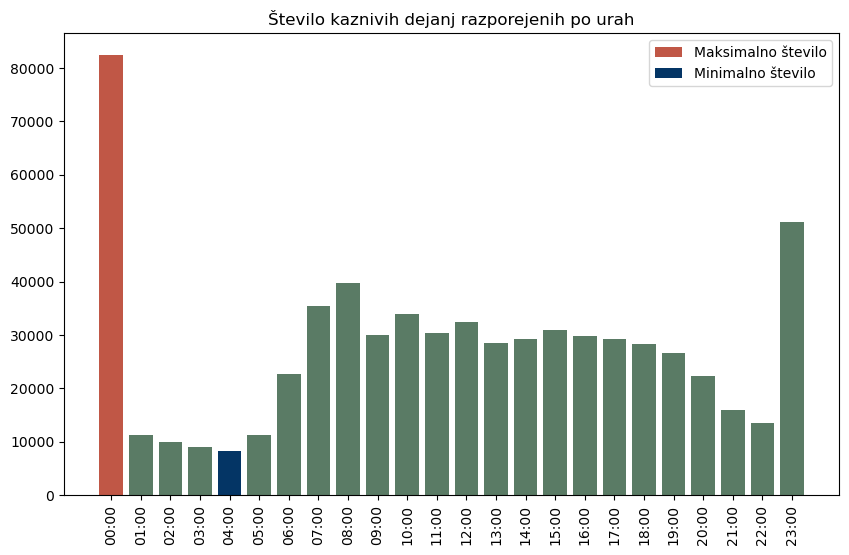

In [49]:
l = {}
ure = sorted(kd['UraStoritve'].unique())
for u in ure:
    l[u[:5]] = np.unique(np.asarray(kd.loc[kd["UraStoritve"] == u, ['ZaporednaStevilkaKD']])).size

u = [x[:5] for x in ure]
# u.insert(0, " ")
# l.insert(0, 0)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Število kaznivih dejanj razporejenih po urah')
plt.bar(l.keys(), l.values(), color='#5A7B65')
plt.bar(*max(l.items(), key=lambda x:x[1]), color='#C05746')
plt.bar(*min(l.items(), key=lambda x:x[1]), color='#043565')
plt.legend(['_nolegend_', 'Maksimalno število', 'Minimalno število'])


 Največ kaznivih dejanj se zgodi med 00:00-00:59, sledi mu 23:00-23:59, najbolj varne pa so jutranje ure (03:00-03:59).

### Katere vrste kaznivih dejanj so najpogostejše?

Vseh vrst kaznivih dejanj je več kot 200, tu je 10 najpogostejših:

In [50]:
vkd = list(kd['OpisKD'].unique())
vrstaKaznivihDejanj = {}
for v in vkd:
    if v.split("'")[0].split('-')[-1].strip() in vrstaKaznivihDejanj :
        vrstaKaznivihDejanj[v.split("'")[0].split('-')[-1].strip()] += np.unique(np.asarray(kd.loc[kd['OpisKD'] == v, ['ZaporednaStevilkaKD']])).size
    else:
        vrstaKaznivihDejanj[v.split("'")[0].split('-')[-1].strip()] = np.unique(np.asarray(kd.loc[kd['OpisKD'] == v, ['ZaporednaStevilkaKD']])).size

<BarContainer object of 10 artists>

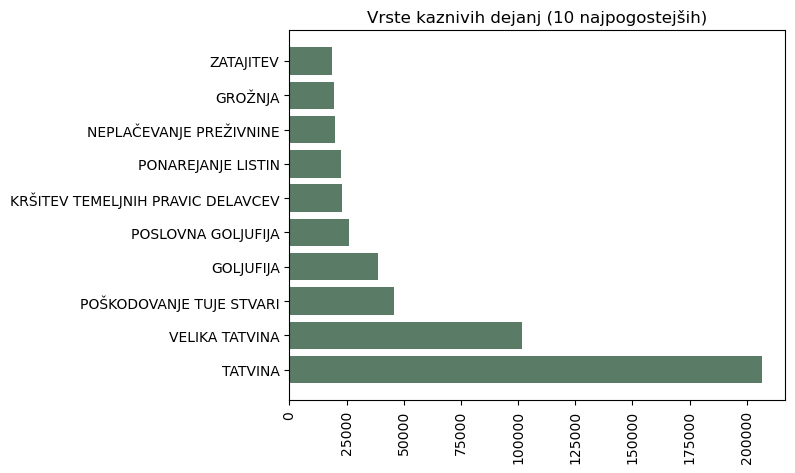

In [51]:
x, y = zip(*sorted(vrstaKaznivihDejanj.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure()
plt.title('Vrste kaznivih dejanj (10 najpogostejših)')
plt.xticks(rotation=90)
plt.barh(x, y, color='#5A7B65')

Največ prijavljenih kaznivih dejanj je tatvin, (skoraj tretjina vseh), potem sledijo goljufije in ostale.

Zanimiv vpogled bi bila primerjava najpogostejših vrst kaznivih dejanj, katerih žrtve so na eni strani moški in na drugi ženske:

In [52]:
vkd = list(kd['OpisKD'].unique())
zrtveZ = {}
for v in vkd:
    if v.split("'")[0].split('-')[-1].strip() in zrtveZ:
        zrtveZ[v.split("'")[0].split('-')[-1].strip()] += np.asarray(kd.loc[(kd['OpisKD'] == v) & (kd['Spol'] == 'ŽENSKI') & (kd['VrstaOsebe'] == 'ŽRTEV'), ['ZaporednaStevilkaKD']]).size
    else:
        zrtveZ[v.split("'")[0].split('-')[-1].strip()] = np.asarray(kd.loc[(kd['OpisKD'] == v) & (kd['Spol'] == 'ŽENSKI') & (kd['VrstaOsebe'] == 'ŽRTEV'), ['ZaporednaStevilkaKD']]).size

### Graf najpogostejših vrst kaznivih dejanj, pri katerih so žrtve ženske

<BarContainer object of 10 artists>

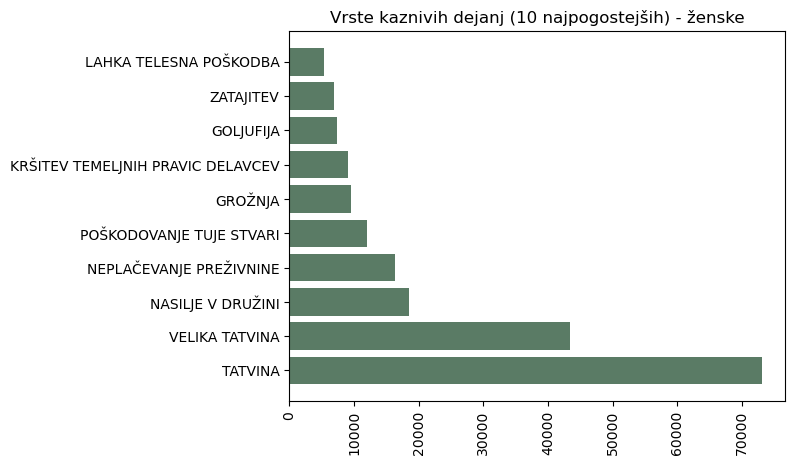

In [53]:
x, y = zip(*sorted(zrtveZ.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure()
plt.title('Vrste kaznivih dejanj (10 najpogostejših) - ženske')
plt.xticks(rotation=90)
plt.barh(x, y, color='#5A7B65')

Pri ženskah so tatvine še vedno daleč najpogostejše, vendar na drugem mestu ni več goljufij, vendar se pojavi nasilje v družini.

### Graf najpogostejših vrst kaznivih dejanj, pri katerih so žrtve moški

In [54]:
vkd = list(kd['OpisKD'].unique())
zrtveM = {}
for v in vkd:
    if v.split("'")[0].split('-')[-1].strip() in zrtveM:
        zrtveM[v.split("'")[0].split('-')[-1].strip()] += np.asarray(kd.loc[(kd['OpisKD'] == v) & (kd['Spol'] == 'MOŠKI') & (kd['VrstaOsebe'] == 'ŽRTEV'), ['ZaporednaStevilkaKD']]).size
    else:
        zrtveM[v.split("'")[0].split('-')[-1].strip()] = np.asarray(kd.loc[(kd['OpisKD'] == v) & (kd['Spol'] == 'MOŠKI') & (kd['VrstaOsebe'] == 'ŽRTEV'), ['ZaporednaStevilkaKD']]).size

<BarContainer object of 10 artists>

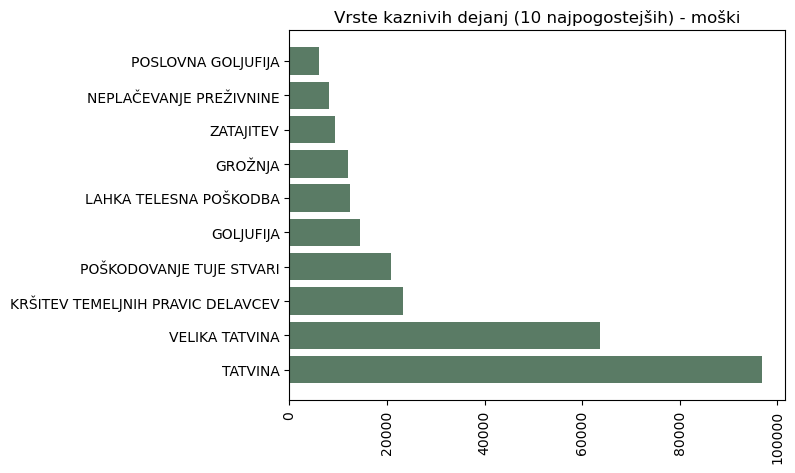

In [55]:
x, y = zip(*sorted(zrtveM.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure()
plt.title('Vrste kaznivih dejanj (10 najpogostejših) - moški')
plt.xticks(rotation=90)
plt.barh(x, y, color='#5A7B65')

Tatvine ostajajo na prvem mestu tudi pri moških, tu pa je pričakovano več "moških" kaznivih dejanj, kot npr. telesne poškodbe.

Kot zanimivost je tu (pričakovano) še število žrtev posilstva, kjer so v veliki meri žrtve ženske.

In [56]:
zrtveZ['POSILSTVO'], zrtveM['POSILSTVO']

(731, 36)

In [57]:
# nic = np.unique(np.asarray(kd.loc[(kd['VplivAlkohola'] == 'NE') & (kd['VplivMamil'] == 'NE'), ['ZaporednaStevilkaKD']])).size
# alko = np.unique(np.asarray(kd.loc[(kd['VplivAlkohola'] == 'DA') & (kd['VplivMamil'] == 'NE'), ['ZaporednaStevilkaKD']])).size
# droge = np.unique(np.asarray(kd.loc[(kd['VplivAlkohola'] == 'NE') & (kd['VplivMamil'] == 'DA'), ['ZaporednaStevilkaKD']])).size
# oboje = np.unique(np.asarray(kd.loc[(kd['VplivAlkohola'] == 'DA') & (kd['VplivMamil'] == 'DA'), ['ZaporednaStevilkaKD']])).size

# nic, alko, droge, oboje

(96843, 1746, 310, 233)

## Razmislek

Vzroki za spremembe trendov:
- Če opazimo upad kaznivih dejanj v določenem obdobju, lahko različni dejavniki, kot so spremembe v zakonodaji ali izboljšane policijske metode prispevajo k temu trendu

Področja s pomanjkljivimi podatki in neprijavljanje: 
- Analiza podatkov o kriminaliteti temelji na prijavljenih kaznivih dejanjih, kar pa ne zajema vseh dejansko izvedenih kaznivih dejanj. Neprijavljanje ali neprepoznavanje kaznivih dejanj je lahko pogost pojav v kriminaliteti in lahko vpliva na natančnost analize podatkov.